### Import Everything

In [485]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from pandas import DataFrame, Series
import seaborn
%matplotlib inline

### Read in Activity File

In [419]:
census = pd.read_csv('data/atusact_2014.dat')

### Cull Activity File to desired series

In [420]:
census = census[['TUCASEID', 'TUACTDUR', 'TRCODE', 'TEWHERE']]

### Set Index to individual ID

In [421]:
census.set_index('TUCASEID')

,TUACTDUR,TRCODE,TEWHERE
TUCASEID,,,
20140101140007,540,10101,-1
20140101140007,30,30101,1
20140101140007,60,10201,-1
20140101140007,10,181101,13
20140101140007,30,110101,4
20140101140007,20,181301,13
20140101140007,90,130116,9
20140101140007,25,181301,13
20140101140007,30,120303,1


### Read in CPS File (for demographic information)

In [422]:
cps_data = pd.read_csv('data/atuscps_2014.dat')

### Cull CPS dataframe to desired series

In [423]:
cps_data = cps_data[['TUCASEID', 'GEREG', 'PRERNWA']]

### Set index to individual ID

In [424]:
cps_data.set_index('TUCASEID')

,GEREG,PRERNWA
TUCASEID,,
20140101140005,3,-1
20140101140005,3,-1
20140101140007,4,-1
20140101140011,1,-1
20140101140011,1,82600
20140101140026,2,-1
20140101140028,3,-1
20140101140028,3,76923
20140101140028,3,-1


### Merge the two dataframes to make one

In [425]:
census = census.merge(cps_data)

### Check to see that merge is successful

In [426]:
census.head()

,TUCASEID,TUACTDUR,TRCODE,TEWHERE,GEREG,PRERNWA
0,20140101140007,540,10101,-1,4,-1
1,20140101140007,30,30101,1,4,-1
2,20140101140007,60,10201,-1,4,-1
3,20140101140007,10,181101,13,4,-1
4,20140101140007,30,110101,4,4,-1


### Rename column titles for ease of reading

In [427]:
new_cols = ['Person_ID', 'Time_Spent', 'Activity', 'Where', 'Region', 'Income']
census.columns = new_cols

### Verify change took effect

In [428]:
census.head()

,Person_ID,Time_Spent,Activity,Where,Region,Income
0,20140101140007,540,10101,-1,4,-1
1,20140101140007,30,30101,1,4,-1
2,20140101140007,60,10201,-1,4,-1
3,20140101140007,10,181101,13,4,-1
4,20140101140007,30,110101,4,4,-1


### Replace "-1" value in income with "N/A"

In [429]:
census['Income'].replace('-1', 'N/A', inplace=True)

### Check that change was made

In [430]:
census.head()

,Person_ID,Time_Spent,Activity,Where,Region,Income
0,20140101140007,540,10101,-1,4,N/A
1,20140101140007,30,30101,1,4,N/A
2,20140101140007,60,10201,-1,4,N/A
3,20140101140007,10,181101,13,4,N/A
4,20140101140007,30,110101,4,4,N/A


### Replace region values with region names

In [431]:
census['Region'].replace(1, 'Northeast', inplace=True)
census['Region'].replace(2, 'Midwest', inplace=True)
census['Region'].replace(3, 'South', inplace=True)
census['Region'].replace(4, 'West', inplace=True)

### Replace where values with location names

In [432]:
census['Where'].replace('-1', 'N/A', inplace=True)
census['Where'].replace(1, 'Home', inplace=True)
census['Where'].replace(2, 'Workplace', inplace=True)
census['Where'].replace(3, 'Another\'s Home', inplace=True)
census['Where'].replace(4, 'Restaurant/Bar', inplace=True)
census['Where'].replace(5, 'Place of Worship', inplace=True)
census['Where'].replace(6, 'Grocery Store', inplace=True)
census['Where'].replace(7, 'Other Store/Mall', inplace=True)
census['Where'].replace(8, 'School', inplace=True)
census['Where'].replace(9, 'Outdoors', inplace=True)
census['Where'].replace(10, 'Library', inplace=True)
census['Where'].replace(11, 'Other Place', inplace=True)
census['Where'].replace(12, 'Automobile-Driver', inplace=True)
census['Where'].replace(13, 'Automobile-Passenger', inplace=True)
census['Where'].replace(14, 'Walking', inplace=True)
census['Where'].replace(15, 'Bus', inplace=True)
census['Where'].replace(16, 'Subway/Train', inplace=True)
census['Where'].replace(17, 'Bicycle', inplace=True)
census['Where'].replace(18, 'Boat/Ferry', inplace=True)
census['Where'].replace(19, 'Taxi/Limo', inplace=True)
census['Where'].replace(20, 'Airplane', inplace=True)
census['Where'].replace(21, 'Other Transport', inplace=True)
census['Where'].replace(30, 'Bank', inplace=True)
census['Where'].replace(31, 'Gym', inplace=True)
census['Where'].replace(32, 'Post Office', inplace=True)
census['Where'].replace(89, 'Unspecified', inplace=True)
census['Where'].replace(99, 'Unspecified Vehicle', inplace=True)

### Check that values are replaced

In [433]:
census.head()

,Person_ID,Time_Spent,Activity,Where,Region,Income
0,20140101140007,540,10101,N/A,West,N/A
1,20140101140007,30,30101,Home,West,N/A
2,20140101140007,60,10201,N/A,West,N/A
3,20140101140007,10,181101,Automobile-Passenger,West,N/A
4,20140101140007,30,110101,Restaurant/Bar,West,N/A


### Convert values in Activity column to string type object (so that 0 can be appended to front of 5 number values, for uniformity of data.)

In [434]:
census['Activity'] = census['Activity'].astype(str)

### type function confirms values have been changed from "int" type to "str" type objects

In [435]:
type(census['Activity'][0])

str

### Define function to add 0 to front of strings of less than 6 digits

In [436]:
def add_a_0(string):
    if len(string) < 6:
        return "0" + string
    else:
        return string

### Run the function on the Activity series and update values accordingly

In [437]:
census['Activity'] = census['Activity'].apply(add_a_0)

### Activity series now uniform in length

In [438]:
census.head()

,Person_ID,Time_Spent,Activity,Where,Region,Income
0,20140101140007,540,010101,N/A,West,N/A
1,20140101140007,30,030101,Home,West,N/A
2,20140101140007,60,010201,N/A,West,N/A
3,20140101140007,10,181101,Automobile-Passenger,West,N/A
4,20140101140007,30,110101,Restaurant/Bar,West,N/A


### Create a function to convert Time_Spent in minutes to hours

In [439]:
def convert_to_hours(time):
    return time/60

### Apply function to series values

In [440]:
census['Time_Spent'] = census['Time_Spent'].apply(convert_to_hours)

### Check that function has returned desired results

In [441]:
census.head()

,Person_ID,Time_Spent,Activity,Where,Region,Income
0,20140101140007,9.000000,010101,N/A,West,N/A
1,20140101140007,0.500000,030101,Home,West,N/A
2,20140101140007,1.000000,010201,N/A,West,N/A
3,20140101140007,0.166667,181101,Automobile-Passenger,West,N/A
4,20140101140007,0.500000,110101,Restaurant/Bar,West,N/A


### Create parallel dataframe grouped by activity and time, and average time spent per activity

In [442]:
activity_by_time = census[['Time_Spent', 'Activity']]

In [443]:
activity_by_time.head()

,Time_Spent,Activity
0,9.000000,010101
1,0.500000,030101
2,1.000000,010201
3,0.166667,181101
4,0.500000,110101


In [444]:
activity_by_time = activity_by_time.groupby('Activity').mean()

### Check that new dataframe contains desired data

In [445]:
activity_by_time.head()

,Time_Spent
Activity,
010101,5.468646
010102,1.294429
010201,0.483883
010299,1.096774
010301,0.838259


### Sort values by average time spent from most to least

In [446]:
activity_by_time = activity_by_time.sort_values('Time_Spent', ascending=False)

### Take the top ten activities by average length of time spent on that activity

In [447]:
top_ten = activity_by_time[:10]

In [448]:
top_ten.head()

,Time_Spent
Activity,
010101,5.468646
130210,4.900000
130226,4.843750
130118,4.728133
130299,4.217647


### Reindex to be able to change Activity values

In [449]:
top_ten = top_ten.reset_index('Person_ID')

In [450]:
top_ten.head()

,Activity,Time_Spent
0,010101,5.468646
1,130210,4.900000
2,130226,4.843750
3,130118,4.728133
4,130299,4.217647


### Replace activity numeric values with english language

In [451]:
top_ten['Activity'].replace('010101', 'Sleeping', inplace=True)
top_ten['Activity'].replace('130210', 'Watching Equestrian Sports', inplace=True)
top_ten['Activity'].replace('130226', 'Watching Vehicle Racing', inplace=True)
top_ten['Activity'].replace('130118', 'Hunting', inplace=True)
top_ten['Activity'].replace('130299', 'Attending Other Sporting Event', inplace=True)
top_ten['Activity'].replace('130112', 'Watching Fishing', inplace=True)
top_ten['Activity'].replace('040301', 'Providing Medical Care to Other People\'s Kids', inplace=True)
top_ten['Activity'].replace('130227', 'Watching Volleyball', inplace=True)
top_ten['Activity'].replace('050203', 'Sports and Exercise (With Coworkers)', inplace=True)
top_ten['Activity'].replace('050101', 'Working', inplace=True)

In [452]:
top_ten.head(10)

,Activity,Time_Spent
0,Sleeping,5.468646
1,Watching Equestrian Sports,4.900000
2,Watching Vehicle Racing,4.843750
3,Hunting,4.728133
4,Attending Other Sporting Event,4.217647
5,Watching Fishing,4.143447
6,Providing Medical Care to Other People's Kids,3.812500
7,Watching Volleyball,3.672222
8,Sports and Exercise (With Coworkers),3.564815
9,Working,3.255123


In [453]:
# top_ten.set_index('Activity')

### Plot the top ten activities

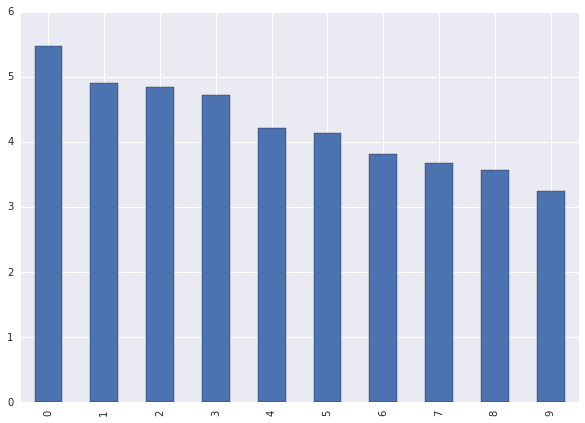

In [486]:
top_ten['Time_Spent'].plot.bar(x=['Activity'], y=['Time_Spent'], figsize = (10, 7))

In [455]:
census.head()

,Person_ID,Time_Spent,Activity,Where,Region,Income
0,20140101140007,9.000000,010101,N/A,West,N/A
1,20140101140007,0.500000,030101,Home,West,N/A
2,20140101140007,1.000000,010201,N/A,West,N/A
3,20140101140007,0.166667,181101,Automobile-Passenger,West,N/A
4,20140101140007,0.500000,110101,Restaurant/Bar,West,N/A


### Create new copy of dataframe to view average amount of sleep by region

In [456]:
average_by_region = census[['Time_Spent', 'Activity', 'Region']]

In [457]:
average_by_region.set_index('Activity')

,Time_Spent,Region
Activity,,
010101,9.000000,West
030101,0.500000,West
010201,1.000000,West
181101,0.166667,West
110101,0.500000,West
181301,0.333333,West
130116,1.500000,West
181301,0.416667,West
120303,0.500000,West


In [458]:
activity_by_time.head()

,Time_Spent
Activity,
010101,5.468646
130210,4.900000
130226,4.843750
130118,4.728133
130299,4.217647


### Merge region and activity dataframes with activity and average time spent dataframes

In [459]:
average_by_region.merge(activity_by_time)

,Time_Spent,Activity,Region
0,0.5,030101,West
1,0.5,030101,West
2,0.5,030101,West
3,0.5,030101,West
4,0.5,030101,West
5,0.5,110101,West
6,0.5,110101,West
7,0.5,110101,West
8,0.5,110101,West
9,0.5,110101,West


In [467]:
test_frame = average_by_region.groupby(['Activity', 'Region']).mean()

### Create double indexed dataframe grouped by region and activity, and average time spent on each activity

In [478]:
sleep_by_region = test_frame['Time_Spent'][0:4]

### Isolate just the sleep data

In [479]:
sleep_by_region.head()

Activity  Region   
010101    Midwest      5.435374
          Northeast    5.396346
          South        5.535193
          West         5.453893
Name: Time_Spent, dtype: float64

### Plot the results

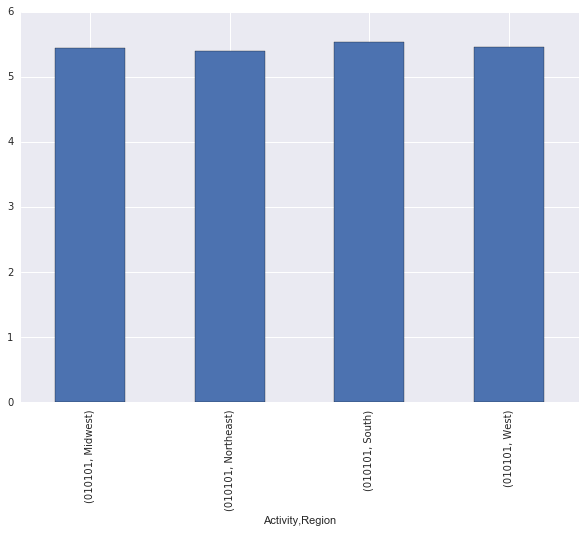

In [487]:
sleep_by_region.plot.bar(figsize = (10, 7), yticks = range(7))

In [460]:
# average_by_region = average_by_region.groupby(['Region', 'Activity']).mean()

In [461]:
# average_by_region = average_by_region.groupby('Region').mean()

In [462]:
# average_by_region.sort_values('Time_Spent')